## Warm up

In [109]:
#importing necessary libraries
import math
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [110]:
xls = pd.ExcelFile("../data/pwt100.xlsx")
all_df = pd.read_excel(xls, "Data")

# 1. Trend Calculation

In [111]:
from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend

In [112]:
# 2.2) Clean data

# Subset relevant columns and compute per capita real GDP
data = all_df.loc[:, ("country", "year", "rgdpna", "pop")] #use 2017 national prices
data["rgdpna_pc"] = data["rgdpna"] / data["pop"]

# select your country as a country
data = data.loc[data["country"] == "Brazil", ("year", "rgdpna", "rgdpna_pc")]
# Reset the index (not crucial)
data.index = data["year"]

Ypc = data["rgdpna_pc"]
ypc = np.log(Ypc)

Y = data["rgdpna"]
y = np.log(Y)

# Compute sample size.
T = len(Y) # sample size used for regression

Next, we will compute four different specifications: (i) additive + linear (ii) additive + quadratic
(iii) exponential + linear and (iv) exponential + quadratic. We will use
`get_regression_coefs(y, x1, x2)` in Python to run our linear regressions.

### a) Linear Additive Model 📈

### GDP trend:

In [113]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [114]:
# Initialise predicted values Yhat
Yhat_add_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

/var/folders/g4/8ft2rrv13nb5qxqxxmh622pc0000gn/T/ipykernel_29651/3092062490.py:9: RuntimeWarning: invalid value encountered in log
  yhat_add_lin = np.log(Yhat_add_lin)


Now we proceed to plot the graph for the linear + additive model.

Text(0.5, 1.0, 'Additive Linear: GDP & trend')

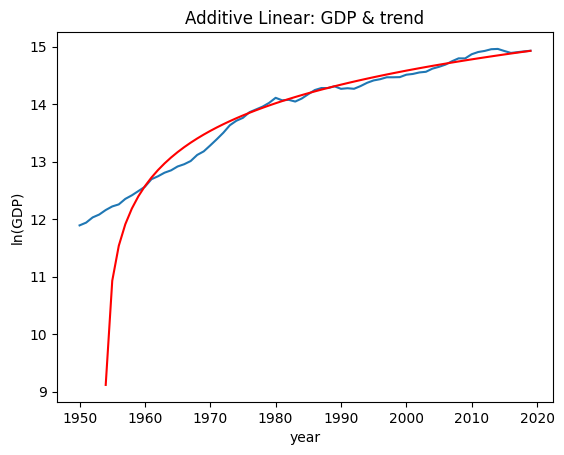

In [115]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_lin, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Linear: GDP & trend")


### GDP per capita trend:

Text(0.5, 1.0, 'Additive Linear: GDP per capita & trend')

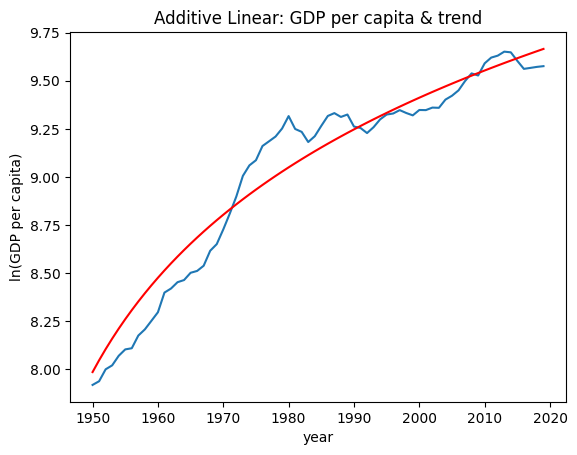

In [116]:
a_add_linpc, b_add_linpc = get_regression_coefs(Ypc, x1, x2)

# Initialise predicted values yhat
Yhat_add_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_linpc[t] = a_add_linpc + b_add_linpc * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_linpc = np.log(Yhat_add_linpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_linpc, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Linear: GDP per capita & trend")

### b) Linear Quadratic Model 📈

In [117]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_add_quad, b_add_quad, c_add_quad = get_regression_coefs(Y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [118]:
# Initialise predicted values Yhat
Yhat_add_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quad[t] = a_add_quad + b_add_quad * (t + 1) + c_add_quad * (t+1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quad = np.log(Yhat_add_quad)

Now we proceed to plot the graph for the linear + quadratic model.

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP) & trend')

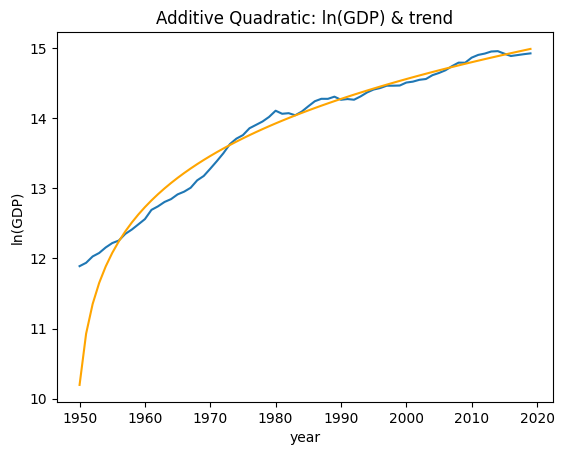

In [119]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_quad, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Quadratic: ln(GDP) & trend")

### GDP per capita trend:

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP per capita) & trend')

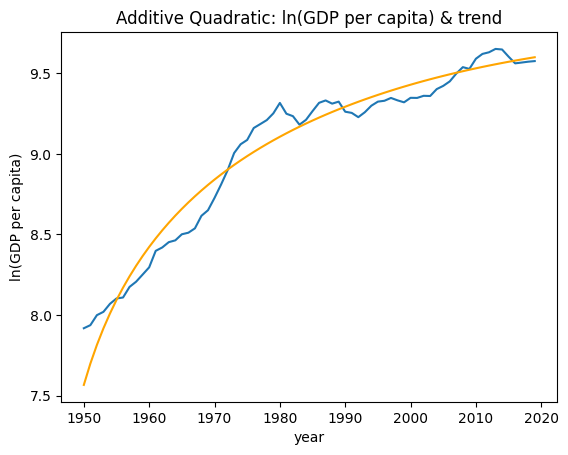

In [120]:
a_add_quadpc, b_add_quadpc, c_add_quadpc = get_regression_coefs(Ypc, x1, x2, x3)

# Initialise predicted values yhat
Yhat_add_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quadpc[t] = a_add_quadpc + b_add_quadpc * (t + 1) + c_add_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quadpc = np.log(Yhat_add_quadpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_quadpc, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Quadratic: ln(GDP per capita) & trend")


### c) Exponential Linear Model 📈

In [121]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_exp_lin, b_exp_lin = get_regression_coefs(y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [122]:
# Initialise predicted values Yhat
yhat_exp_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1) # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + linear model.

Text(0.5, 1.0, 'Exponential Linear: GDP & trend')

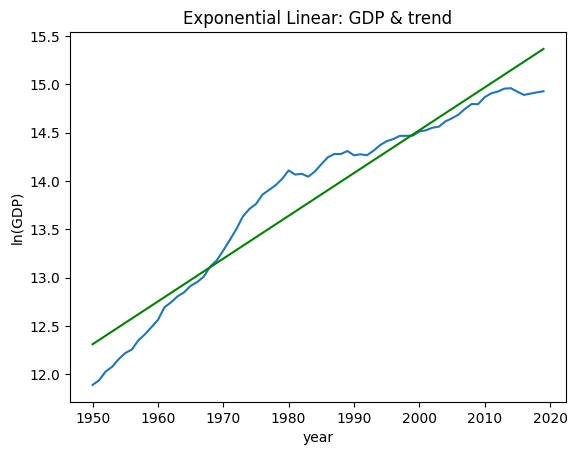

In [123]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_lin, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Linear: GDP & trend")


Text(0.5, 1.0, 'Exponential Linear: GDP per capita & trend')

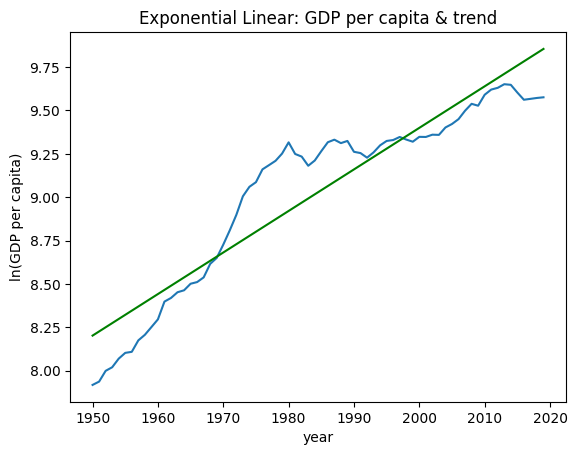

In [124]:
a_exp_linpc, b_exp_linpc = get_regression_coefs(ypc, x1, x2)

# Initialise predicted values yhat
yhat_exp_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_linpc[t] = a_exp_linpc + b_exp_linpc * (t + 1) # recall that Python indexing starts at 0

# No need to convert to log units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_linpc, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Linear: GDP per capita & trend")

### d) Exponential Quadratic Model 📈

In [125]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [126]:
# Initialise predicted values yhat
yhat_exp_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad[t] = a_exp_quad + b_exp_quad * (t + 1) + c_exp_quad * (t+1)**2 # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + quadratic model.

Text(0.5, 1.0, 'Exponential Quadratic: GDP & trend')

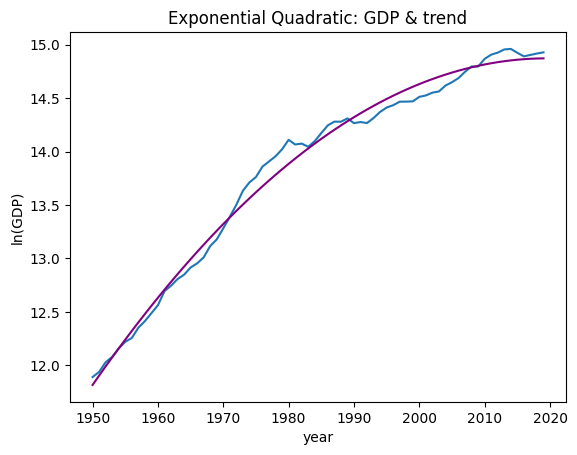

In [127]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_quad, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Quadratic: GDP & trend")


Text(0.5, 1.0, 'Exponential Quadratic: ln(GDP per capita) & trend')

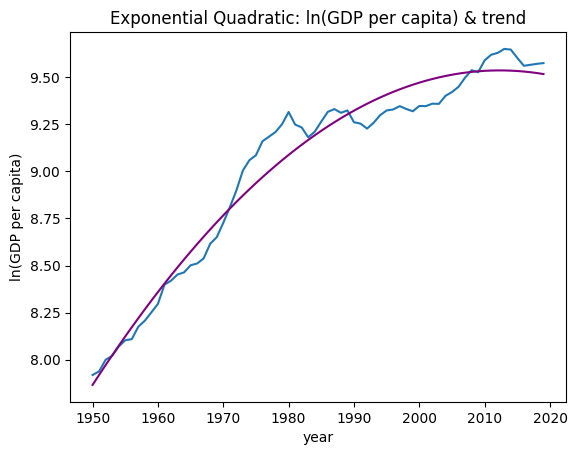

In [128]:
a_exp_quadpc, b_exp_quadpc, c_exp_quadpc = get_regression_coefs(ypc, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quadpc[t] = a_exp_quadpc + b_exp_quadpc * (t + 1) + c_exp_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# No need to convert into log-units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_quadpc, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Quadratic: ln(GDP per capita) & trend")

# 2. Extracting TFP

We use the production function $Y = AK^\alpha(HL)^{1-\alpha}$
* A is TFP
* K is capital stock
* H is human capital index
* L is annual hours worked in the economy.
* L = average annual hours worked by an employed worker x number of employed workers
* We set **alpha = 0.5**

Therefore,
 $$TFP = A=Y/{K^{\alpha}(HL)^{1-\alpha}}$$

In [129]:
alpha = 0.5

#Get relevant variables for Brazil
data_tfp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna", "rnna", "hc", "emp", "avh", "rtfpna", "delta")]
data_tfp["labour"] = data_tfp["emp"]*data_tfp["avh"]

data.index = data['year']

#Extract TFP
data_tfp["tfp"] = data_tfp["rgdpna"] / (data_tfp["rnna"]**alpha*(data_tfp["hc"]*data_tfp["labour"])**(1-alpha))
    

Text(0.5, 1.0, 'TFP series')

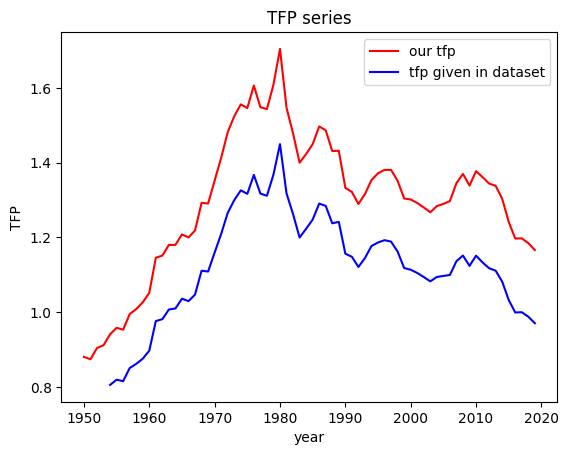

In [130]:
plt.figure()
plt.plot(data_tfp["year"], data_tfp["tfp"], color = "red", label = "our tfp")
plt.plot(data_tfp["year"], data_tfp["rtfpna"], color = "blue", label = "tfp given in dataset") #plotting the tfp values given in dataset for reference

plt.legend(loc="upper right", fontsize=10)

plt.xlabel("year")
plt.ylabel("TFP")

plt.title("TFP series")

# 3. Growth Accounting

$$g_Y = g_A + \alpha g_K + (1-\alpha)g_H + (1-\alpha)g_L$$

Growth accounting equations:

$$
\begin{aligned}
\text{contr\_A} = \frac{g_A}{g_Y} \\
\text{contr\_K} = \alpha \cdot \frac{g_K}{g_Y} \\
\text{contr\_H} = (1-\alpha) \cdot \frac{g_H}{g_Y} \\
\text {contr\_L} = (1-\alpha) \cdot \frac{g_L}{g_Y}
\end{aligned}
$$

In [131]:
#def function to calculate growth rates
def compute_growth_rate(X):
    #np.log is the natural logarithm by default in numpy
    #use of index slicing, e.g. X[1:] are all values starting from the second element, X[:-1] all elements up until (but not including) the last element
    Y = X.to_numpy() #so operations are purely element wise
    return np.log(Y[1:] / Y[:-1])

gY = compute_growth_rate(data_tfp["rgdpna"])
gA = compute_growth_rate(data_tfp["tfp"])
gK = compute_growth_rate(data_tfp["rnna"])
gH = compute_growth_rate(data_tfp["hc"])
gL = compute_growth_rate(data_tfp["labour"])

In [132]:
contr_A = gA / gY
contr_K = alpha * gK / gY
contr_H = (1-alpha) * gH / gY
contr_L = (1- alpha) * gL / gY

In [133]:
# Compute yearly intervals of the form "2000-2001"
intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(data_tfp["year"][:-1], data_tfp["year"][1:])])

# Fill in the dataframe
df_contr = pd.DataFrame(
    data = np.hstack((intvls[:, None], contr_K[:, None], contr_L[:, None], contr_H[:, None], contr_A[:, None], gY[:, None])),
    columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y growth rate']
)

# Specify the data types for specific columns (it would be more efficient to define dataypes already before creating dataframe)
df_contr = df_contr.astype({
    'year': 'object',
    'K contribution': 'float64',
    'L contribution': 'float64',
    'H contribution': 'float64',
    'A contribution': 'float64',
    'Y growth rate' : 'float64'})

# Set index
df_contr = df_contr.set_index('year')

# Set display options
pd.set_option('display.float_format', '{:.4f}'.format)

In [134]:
# create dataframe of log values
ln_data_tfp= data_tfp.drop(columns='year').apply(np.log)
ln_data_tfp['year'] = data_tfp['year']

In [135]:
# Compute yearly intervals of the form "2000-2010"
dec_intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(data_tfp[data_tfp["year"] % 10 == 0]["year"][:-1], data_tfp[data_tfp["year"] % 10==0]["year"][1:])])


# dec_change is the difference in logs of the variables within each decade
# First row is NaN, second row is the difference between 1950 and 1960, so we delete first row
dec_change = ln_data_tfp[ln_data_tfp["year"] % 10 == 0][["rgdpna", "tfp", "rnna", "hc", "labour"]].diff().iloc[1:,:]


# Multiply log changes of each variable by different scalars according to the production function to obtain their growth contributions
mul_dict={"tfp":1, "rnna":alpha, "hc":(1-alpha), "labour":(1-alpha)}


# dec_contr is the growth contribution of each variable in each decade
# rearrange the columns the way we want them
dec_contr = dec_change.drop(columns = "rgdpna").mul(mul_dict).divide(dec_change["rgdpna"], axis=0).reindex(columns = ["rnna", "labour", "hc", "tfp"])

# Annualize Y growth rate
dec_to_annual_Y = dec_change["rgdpna"]/10

In [136]:

# Put together the dataframe
df_dec_contr = pd.DataFrame(data = np.hstack((dec_intvls[:, None], 
                                           dec_contr.to_numpy(), 
                                           dec_to_annual_Y.to_numpy()[:, None])),
                            columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y annual growth rate'])

# Set index
df_dec_contr = df_dec_contr.set_index('year')

# Specify data type as float64
df_dec_contr = df_dec_contr.astype("float64")

print(df_dec_contr)

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1960          0.4377          0.2445          0.0528          0.2649   
1960-1970          0.4147          0.1804          0.0560          0.3490   
1970-1980          0.5400          0.1930         -0.0128          0.2798   
1980-1990          1.1499          0.9535          0.4715         -1.5750   
1990-2000          0.5810          0.1589          0.3561         -0.0960   
2000-2010          0.3006          0.2733          0.2672          0.1589   

           Y annual growth rate  
year                             
1950-1960                0.0672  
1960-1970                0.0719  
1970-1980                0.0828  
1980-1990                0.0156  
1990-2000                0.0246  
2000-2010                0.0356  


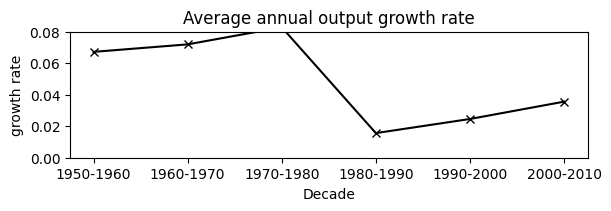

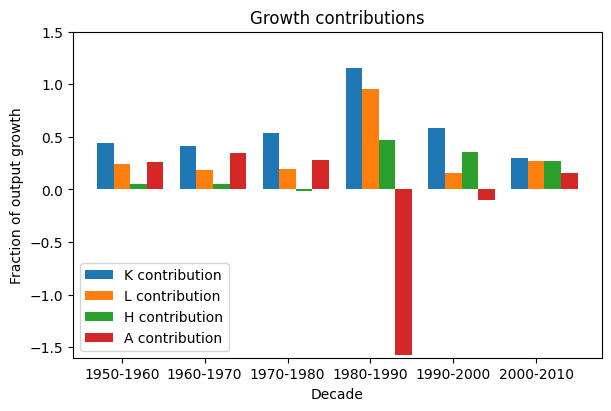

In [137]:

x = np.arange(len(dec_intvls))  # the label locations

fig, ax1 = plt.subplots(layout='constrained', figsize=(6, 2))
ax1.set_title('Average annual output growth rate')
ax1.plot(x, df_dec_contr["Y annual growth rate"], color='black', marker='x', label='Y growth rate')
ax1.set_ylabel('growth rate')
ax1.set_xlabel('Decade')
ax1.set_xticks(x, dec_intvls)
ax1.set_ylim(0, 0.08)

width = 0.2  # the width of the bars
multiplier = 0

fig, ax2 = plt.subplots(layout='constrained', figsize=(6, 4))

for factor, contr in df_dec_contr.drop(columns = "Y annual growth rate").to_dict("list").items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, contr, width, label=factor)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_title('Growth contributions')
ax2.set_ylabel('Fraction of output growth')
ax2.set_xticks(x + width, dec_intvls)
ax2.legend(loc='lower left', ncols=1)
ax2.set_ylim(-1.6, 1.5)
ax2.set_xlabel('Decade')

plt.show()


## Splitting by 1950-1964, 1964-1980, 1980-1994, 1994-2019

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1964          0.4182          0.2230          0.0527          0.3061   
1964-1980          0.5065          0.1905          0.0117          0.2914   
1980-1994          0.9008          0.5764          0.4057         -0.8829   
1994-2019          0.5077          0.2897          0.4697         -0.2672   

           Y annual growth rate  
year                             
1950-1964                0.0684  
1964-1980                0.0789  
1980-1994                0.0187  
1994-2019                0.0223  


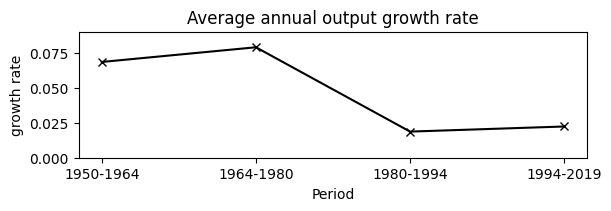

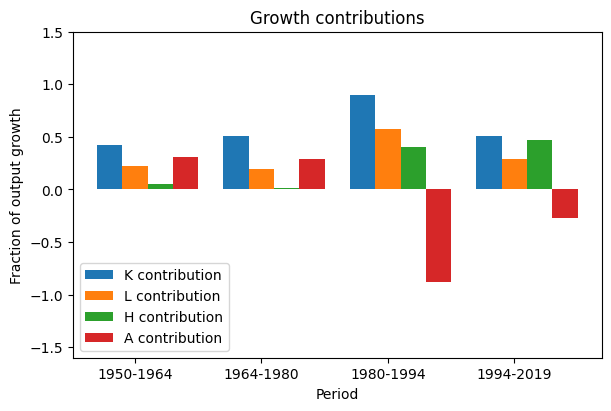

In [138]:

# Compute yearly intervals of the form "1950-1964"
period_intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip([1950,1964,1980,1994,2019][:-1], [1950,1964,1980,1994,2019][1:])])

period_change = ln_data_tfp[ln_data_tfp["year"].isin([1950,1964,1980,1994,2019])][["rgdpna", "tfp", "rnna", "hc", "labour"]].diff().iloc[1:,:]


# Multiply log changes of each variable by different scalars according to the production function to obtain their growth contributions
mul_dict={"tfp":1, "rnna":alpha, "hc":(1-alpha), "labour":(1-alpha)}


# period_contr is the growth contribution of each variable in each period
# rearrange the columns the way we want them
period_contr = period_change.drop(columns = "rgdpna").mul(mul_dict).divide(period_change["rgdpna"], axis=0).reindex(columns = ["rnna", "labour", "hc", "tfp"])

# Annualize Y growth rate
period_to_annual_Y = np.array([rate/years for rate, years in zip(period_change["rgdpna"], [1964-1950, 1980-1964, 1994-1980, 2019-1994])])


# Put together the dataframe
df_period_contr = pd.DataFrame(data = np.hstack((period_intvls[:, None], 
                                           period_contr.to_numpy(), 
                                           period_to_annual_Y[:, None])),
                            columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y annual growth rate'])

# Set index
df_period_contr = df_period_contr.set_index('year')

# Specify data type as float64
df_period_contr = df_period_contr.astype("float64")

print(df_period_contr)

x = np.arange(len(period_intvls))  # the label locations

fig, ax1 = plt.subplots(layout='constrained', figsize=(6, 2))
ax1.set_title('Average annual output growth rate')
ax1.plot(x, df_period_contr["Y annual growth rate"], color='black', marker='x', label='Y growth rate')
ax1.set_ylabel('growth rate')
ax1.set_xlabel('Period')
ax1.set_xticks(x, period_intvls)
ax1.set_ylim(0, 0.09)

width = 0.2  # the width of the bars
multiplier = 0

fig, ax2 = plt.subplots(layout='constrained', figsize=(6, 4))

for factor, contr in df_period_contr.drop(columns = "Y annual growth rate").to_dict("list").items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, contr, width, label=factor)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_title('Growth contributions')
ax2.set_ylabel('Fraction of output growth')
ax2.set_xticks(x + width, period_intvls)
ax2.legend(loc='lower left', ncols=1)
ax2.set_ylim(-1.6, 1.5)
ax2.set_xlabel('Period')

plt.show()

In [139]:
period_change

,rgdpna,tfp,rnna,hc,labour
1694,0.9572,0.2930,0.8006,0.1009,0.4269
1710,1.2617,0.3676,1.2781,0.0294,0.4807
1724,0.2612,-0.2306,0.4705,0.2119,0.3011
1749,0.5574,-0.1489,0.5660,0.5236,0.3230


## Solow model

$$K' = K + {savings rate} * Y - K*{\delta}$$
$${savings rate} = (K' - K (1-{\delta}) )/Y$$

In [161]:
savings_rate= [np.nan]+[(data_tfp["rnna"].iloc[i]-data_tfp["rnna"].iloc[i-1]*(1 - data_tfp["delta"].iloc[i]))/data_tfp["rgdpna"].iloc[i]
                for i in range(1, data_tfp.shape[0])]

data_tfp["savings_rate"]=savings_rate

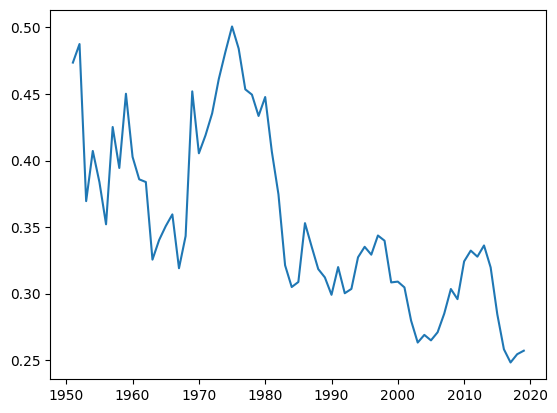

In [162]:
plt.figure()
plt.plot(data_tfp["year"], data_tfp["savings_rate"])

With the factors of production values of the first year of each period, as well as the gH, gL and gA of each period, we can try using the Solow model to predict the remaining years and compare that to the actual data.

Set depreciation rate as 0.05 and savings rate as 0.45:

In [ ]:
delta = 0.05
save_K = 0.45

def production(K, L, H, A):
    return A * K**alpha  * (H * L)**(1-alpha)

def next_year(last_year_dict, gL, gH, gA):
    Y = last_year_dict["rgdpna"]
    K = last_year_dict["rnna"]
    H = last_year_dict["hc"]
    L = last_year_dict["labour"]
    A = last_year_dict["tfp"]
    new_K = K + save_K * Y - delta * K
    new_L = L * (math.e ** (gL))
    new_H = H * (math.e ** (gH))
    new_A = A * (math.e ** (gA))
    new_Y = production(new_K, new_L, new_H, new_A)
    return {"rgdpna": new_Y, "rnna": new_K,  "labour": new_L, "hc": new_H, "tfp": new_A}

In [78]:
def solow_simulation(starting_year, gL, gH, gA, years):
    df_starting = data_tfp[data_tfp["year"] == starting_year][["year", "rgdpna", "rnna", "hc", "labour", "tfp"]].reset_index(drop=True)
    starting_dict = df_starting.drop(columns = "year").to_dict("records")[0]
    evolution = [starting_dict]
    for i in range(years):
        evolution.append(next_year(evolution[i], gL, gH, gA))
    df_ev = pd.DataFrame(evolution)
    df_ev["K/HAL"] = df_ev["rnna"] / (df_ev["hc"] * df_ev["labour"] * df_ev["tfp"])
    return df_ev

In [79]:
solow_1950_1964 = solow_simulation(1950, 0.4269/14, 0.1009/14, 0.2930/14, 14)
solow_1964_1980 = solow_simulation(1964, period_change["labour"].iloc[1]/16, period_change["hc"].iloc[1]/16, period_change["tfp"].iloc[1]/16, 16)
solow_1980_1994 = solow_simulation(1980, period_change["labour"].iloc[2]/14, period_change["hc"].iloc[2]/14, period_change["tfp"].iloc[2]/14, 14)
solow_1994_2019 = solow_simulation(1994, period_change["labour"].iloc[3]/25, period_change["hc"].iloc[3]/25, period_change["tfp"].iloc[3]/25, 25)

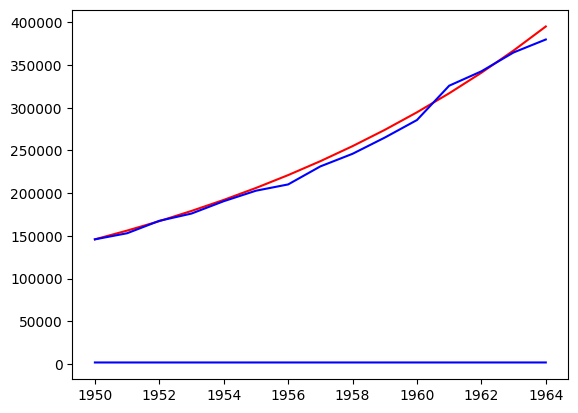

In [145]:
plt.figure()
plt.plot(range(1950,1965), solow_1950_1964["rgdpna"], color = "red", label = "our model")
plt.plot(range(1950,1965),data_tfp["rgdpna"][:15].reset_index(), color = "blue", label = "data")

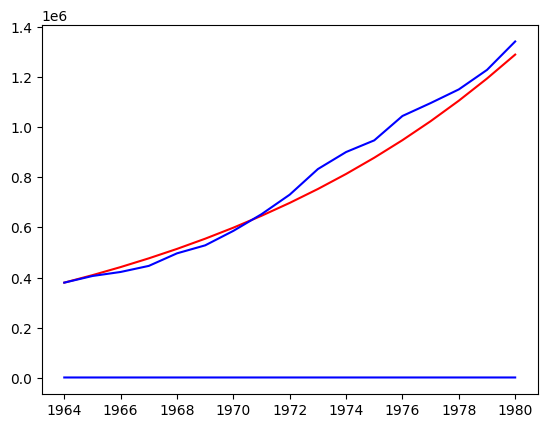

In [146]:
plt.figure()
plt.plot(range(1964,1981), solow_1964_1980["rgdpna"], color = "red", label = "our model")
plt.plot(range(1964,1981), data_tfp["rgdpna"][14:31].reset_index(), color = "blue", label = "data")


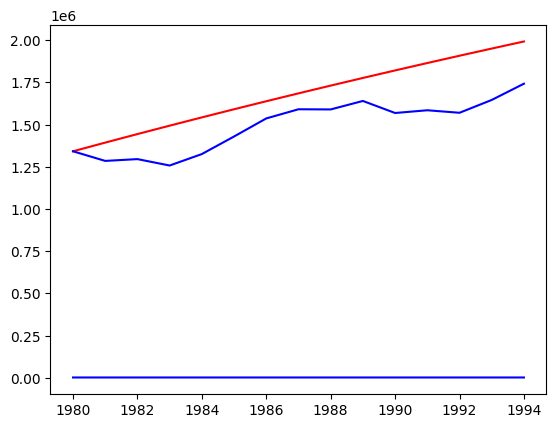

In [147]:
plt.figure()
plt.plot(range(1980,1995), solow_1980_1994["rgdpna"], color = "red", label = "our model")
plt.plot(range(1980,1995), data_tfp["rgdpna"][30:45].reset_index(), color = "blue", label = "data")

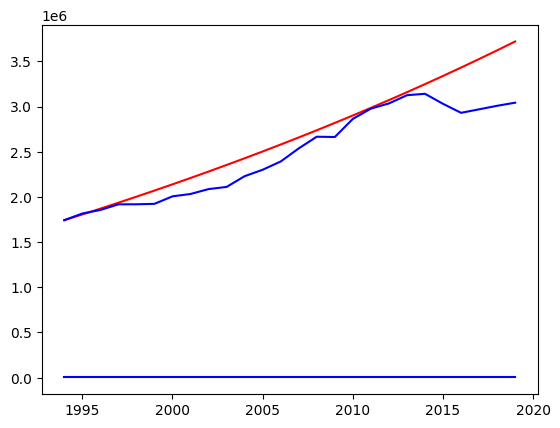

In [150]:
plt.figure()
plt.plot(range(1994,2020), solow_1994_2019["rgdpna"], color = "red", label = "our model")
plt.plot(range(1994,2020), data_tfp["rgdpna"][44:70].reset_index(), color = "blue", label = "data")

# 4. Labour Productivity

In [84]:
#subset of brazil's year, real gdp, and population data
data_lp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna","emp")]
data_lp["lp"] = data_lp["rgdpna"] / data_lp["emp"]
# Reset the index (not crucial)
data_lp = data_lp.reset_index(drop = True)

Text(0.5, 1.0, 'Labour Productivity Series')

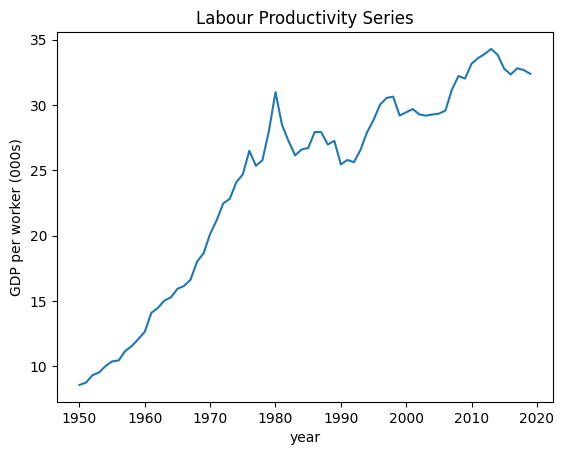

In [85]:
plt.figure()
plt.plot(data_lp['year'],data_lp['lp']/1000) #show gdp per worker in thousands

#labels
plt.xlabel("year")
plt.ylabel("GDP per worker (000s)")

#title
plt.title("Labour Productivity Series")

# Analysis

Text(0.5, 1.0, 'Labour Growth')

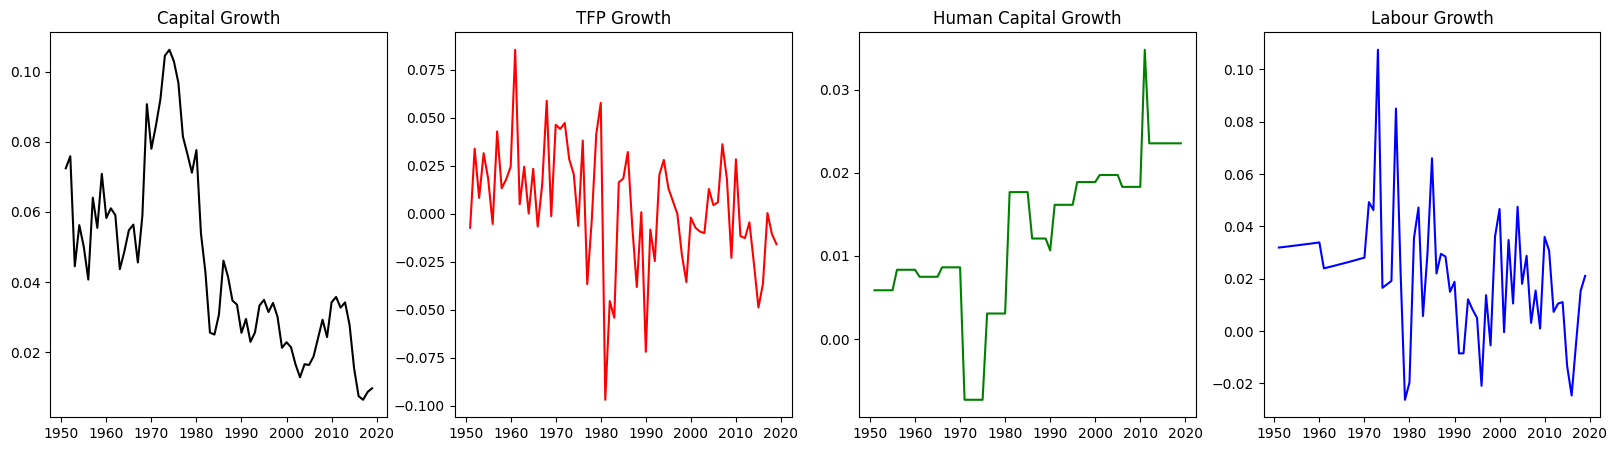

In [86]:
gK_year = pd.Series(np.insert(gK, 0, np.nan), index=data_tfp['year'])
gA_year = pd.Series(np.insert(gA, 0, np.nan), index=data_tfp['year'])
gH_year = pd.Series(np.insert(gH, 0, np.nan), index=data_tfp['year'])
gL_year = pd.Series(np.insert(gL, 0, np.nan), index=data_tfp['year'])

f, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=[20,5])
ax1.plot(gK_year.index, gK_year.values, color = 'black')
ax1.set_title('Capital Growth')
ax2.plot(gA_year.index, gA_year.values, color = 'red')
ax2.set_title('TFP Growth')
ax3.plot(gH_year.index, gH_year.values, color = 'green')
ax3.set_title('Human Capital Growth')
ax4.plot(gL_year.index, gL_year.values, color = 'blue')
ax4.set_title('Labour Growth')


In [87]:
factor_growth = pd.DataFrame(np.column_stack((gK_year,gL_year,gH_year,gA_year)), columns = ['K','L','H','A'], index=data_tfp['year'])

In [88]:
BINS = [1950, 1980, 1994, 2020]

factor_growth['subperiod'] = pd.cut(factor_growth.index, bins = BINS, right = False)
factor_growth.groupby(by = ['subperiod']).mean()

/var/folders/g4/8ft2rrv13nb5qxqxxmh622pc0000gn/T/ipykernel_29651/3401560224.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  factor_growth.groupby(by = ['subperiod']).mean()


,K,L,H,A
subperiod,,,,
"[1950, 1980)",0.0690,0.0320,0.0044,0.0208
"[1980, 1994)",0.0368,0.0195,0.0142,-0.0143
"[1994, 2020)",0.0231,0.0127,0.0208,-0.0046


In [89]:
factor_growth.loc[1981]

K                  0.0539
L                  0.0355
H                  0.0177
A                 -0.0970
subperiod    [1980, 1994)
Name: 1981, dtype: object